# Getting imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import mplfinance as mpf
import yfinance as yf

# Extracting historical price data

We start by pulling the data using the YFinance API, and join the data into a single multi-indexed dataframe for visualisation. 

In [2]:
all_data = pd.DataFrame()
ticker_list = ["MSFT", "AAPL", "NVDA", "AMZN", "GOOG", "META", "TSLA"]

for ticker in ticker_list:
    price_hist = yf.Ticker(ticker).history(start="2013-01-01", end="2023-12-31")
    price_hist = price_hist.drop(["Volume", "Dividends", "Stock Splits"], axis=1)    # We drop columns that will be unused for now to clean up our visualisation
    price_hist.columns = pd.MultiIndex.from_product([[ticker], price_hist.columns])
    if all_data.empty:
        all_data = price_hist
    else:
        all_data = all_data.join(price_hist, on='Date')

all_data.head()

MSFT                                   \
                                Open       High        Low      Close   
Date                                                                    
2013-01-02 00:00:00-05:00  22.190972  22.581858  22.109537  22.492281   
2013-01-03 00:00:00-05:00  22.500425  22.516712  22.117682  22.190973   
2013-01-04 00:00:00-05:00  22.207259  22.264263  21.767510  21.775654   
2013-01-07 00:00:00-05:00  21.800080  21.889657  21.694214  21.734932   
2013-01-08 00:00:00-05:00  21.783792  21.816367  21.547631  21.620922   

                                AAPL                                   \
                                Open       High        Low      Close   
Date                                                                    
2013-01-02 00:00:00-05:00  16.870954  16.906901  16.499613  16.725037   
2013-01-03 00:00:00-05:00  16.690005  16.744533  16.480420  16.513929   
2013-01-04 00:00:00-05:00  16.357655  16.408224  16.018298  16.053940   
2013-01-07 00:00:00-05:00  15.901626  16.124005  15.694479  15.959506   
2013-01-08 00:00:00-05:00  16.121264  16.202905  15.878780  16.002459   

                               NVDA            ... GOOG             META  \
                               Open      High  ...  Low Close       Open   
Date                                           ...                         
2013-01-02 00:00:00-05:00  0.289867  0.293791  ...  NaN   NaN  27.383728   
2013-01-03 00:00:00-05:00  0.293560  0.297022  ...  NaN   NaN  27.822826   
2013-01-04 00:00:00-05:00  0.294252  0.304407  ...  NaN   NaN  27.952559   
2013-01-07 00:00:00-05:00  0.303253  0.304176  ...  NaN   NaN  28.631166   
2013-01-08 00:00:00-05:00  0.295406  0.296329  ...  NaN   NaN  29.449484   

                                                                TSLA  \
                                High        Low      Close      Open   
Date                                                                   
2013-01-02 00:00:00-05:00  28.122210  27.363769  27.942579  2.333333   
2013-01-03 00:00:00-05:00  28.411616  27.533422  27.713053  2.345333   
2013-01-04 00:00:00-05:00  28.870673  27.772928  28.701021  2.320000   
2013-01-07 00:00:00-05:00  29.728911  28.591247  29.359669  2.320000   
2013-01-08 00:00:00-05:00  29.539300  28.800818  29.000406  2.300000   

                                                         
                               High       Low     Close  
Date                                                     
2013-01-02 00:00:00-05:00  2.363333  2.314000  2.357333  
2013-01-03 00:00:00-05:00  2.363333  2.316667  2.318000  
2013-01-04 00:00:00-05:00  2.320000  2.261333  2.293333  
2013-01-07 00:00:00-05:00  2.320000  2.260000  2.289333  
2013-01-08 00:00:00-05:00  2.300000  2.207333  2.245333  

[5 rows x 28 columns]

As a sanity check, we plot out the various time series and confirm that they match our expectations.
We display close prices instead of a candlestick chart to make the plot less noisy.

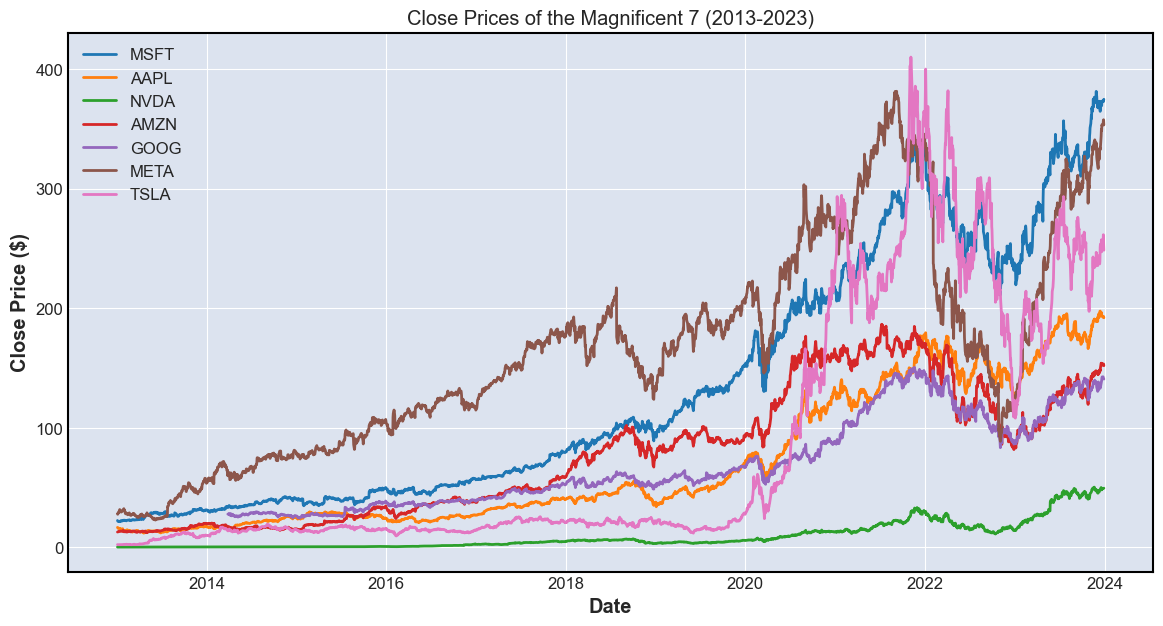

In [12]:
plt.figure(figsize=(14, 7))
for ticker in ticker_list:
    plt.plot(all_data[ticker]['Close'], label=ticker)

plt.title('Close Prices of the Magnificent 7 (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.show()

# Implementing indicators

We now sequentially create our indicators in the following order:

1. Calculate the 20-day Simple Moving Average (SMA):
   - Compute the 20-day SMA of the close prices.
   
2. Calculate the Bollinger Bands:
   - Using the 20-day SMA, calculate the 1 and 2 standard deviation Bollinger Bands:
     - 1-SD Bollinger Bands: Given by `SMA ± 1 * σ`
     - 2-SD Bollinger Bands: Given by `SMA ± 2 * σ`

In [4]:
for ticker in ticker_list:
    # Calculating SMA and standard deviation using a rolling window
    all_data[(ticker, 'SMA_20')] = all_data[(ticker, 'Close')].rolling(window=20).mean()
    all_data[(ticker, 'STD_20')] = all_data[(ticker, 'Close')].rolling(window=20).std()

    # Calculating Bollinger Bands for each ticker, using the STD_20 column
    all_data[(ticker, 'Bollinger_Upper_1SD')] = all_data[(ticker, 'SMA_20')] + all_data[(ticker, 'STD_20')]
    all_data[(ticker, 'Bollinger_Lower_1SD')] = all_data[(ticker, 'SMA_20')] - all_data[(ticker, 'STD_20')]
    all_data[(ticker, 'Bollinger_Upper_2SD')] = all_data[(ticker, 'SMA_20')] + 2 * all_data[(ticker, 'STD_20')]
    all_data[(ticker, 'Bollinger_Lower_2SD')] = all_data[(ticker, 'SMA_20')] - 2 * all_data[(ticker, 'STD_20')]

all_data.head()

MSFT                                   \
                                Open       High        Low      Close   
Date                                                                    
2013-01-02 00:00:00-05:00  22.190972  22.581858  22.109537  22.492281   
2013-01-03 00:00:00-05:00  22.500425  22.516712  22.117682  22.190973   
2013-01-04 00:00:00-05:00  22.207259  22.264263  21.767510  21.775654   
2013-01-07 00:00:00-05:00  21.800080  21.889657  21.694214  21.734932   
2013-01-08 00:00:00-05:00  21.783792  21.816367  21.547631  21.620922   

                                AAPL                                   \
                                Open       High        Low      Close   
Date                                                                    
2013-01-02 00:00:00-05:00  16.870954  16.906901  16.499613  16.725037   
2013-01-03 00:00:00-05:00  16.690005  16.744533  16.480420  16.513929   
2013-01-04 00:00:00-05:00  16.357655  16.408224  16.018298  16.053940   
2013-01-07 00:00:00-05:00  15.901626  16.124005  15.694479  15.959506   
2013-01-08 00:00:00-05:00  16.121264  16.202905  15.878780  16.002459   

                               NVDA            ...                META  \
                               Open      High  ... Bollinger_Upper_1SD   
Date                                           ...                       
2013-01-02 00:00:00-05:00  0.289867  0.293791  ...                 NaN   
2013-01-03 00:00:00-05:00  0.293560  0.297022  ...                 NaN   
2013-01-04 00:00:00-05:00  0.294252  0.304407  ...                 NaN   
2013-01-07 00:00:00-05:00  0.303253  0.304176  ...                 NaN   
2013-01-08 00:00:00-05:00  0.295406  0.296329  ...                 NaN   

                                                                   \
                          Bollinger_Lower_1SD Bollinger_Upper_2SD   
Date                                                                
2013-01-02 00:00:00-05:00                 NaN                 NaN   
2013-01-03 00:00:00-05:00                 NaN                 NaN   
2013-01-04 00:00:00-05:00                 NaN                 NaN   
2013-01-07 00:00:00-05:00                 NaN                 NaN   
2013-01-08 00:00:00-05:00                 NaN                 NaN   

                                                TSLA         \
                          Bollinger_Lower_2SD SMA_20 STD_20   
Date                                                          
2013-01-02 00:00:00-05:00                 NaN    NaN    NaN   
2013-01-03 00:00:00-05:00                 NaN    NaN    NaN   
2013-01-04 00:00:00-05:00                 NaN    NaN    NaN   
2013-01-07 00:00:00-05:00                 NaN    NaN    NaN   
2013-01-08 00:00:00-05:00                 NaN    NaN    NaN   

                                                                   \
                          Bollinger_Upper_1SD Bollinger_Lower_1SD   
Date                                                                
2013-01-02 00:00:00-05:00                 NaN                 NaN   
2013-01-03 00:00:00-05:00                 NaN                 NaN   
2013-01-04 00:00:00-05:00                 NaN                 NaN   
2013-01-07 00:00:00-05:00                 NaN                 NaN   
2013-01-08 00:00:00-05:00                 NaN                 NaN   

                                                                   
                          Bollinger_Upper_2SD Bollinger_Lower_2SD  
Date                                                               
2013-01-02 00:00:00-05:00                 NaN                 NaN  
2013-01-03 00:00:00-05:00                 NaN                 NaN  
2013-01-04 00:00:00-05:00                 NaN                 NaN  
2013-01-07 00:00:00-05:00                 NaN                 NaN  
2013-01-08 00:00:00-05:00                 NaN                 NaN  

[5 rows x 70 columns]

Now, we can plot out the charts with our indicators, taking MSFT as an example. We use only the last 90 days to get a better view of the plot.

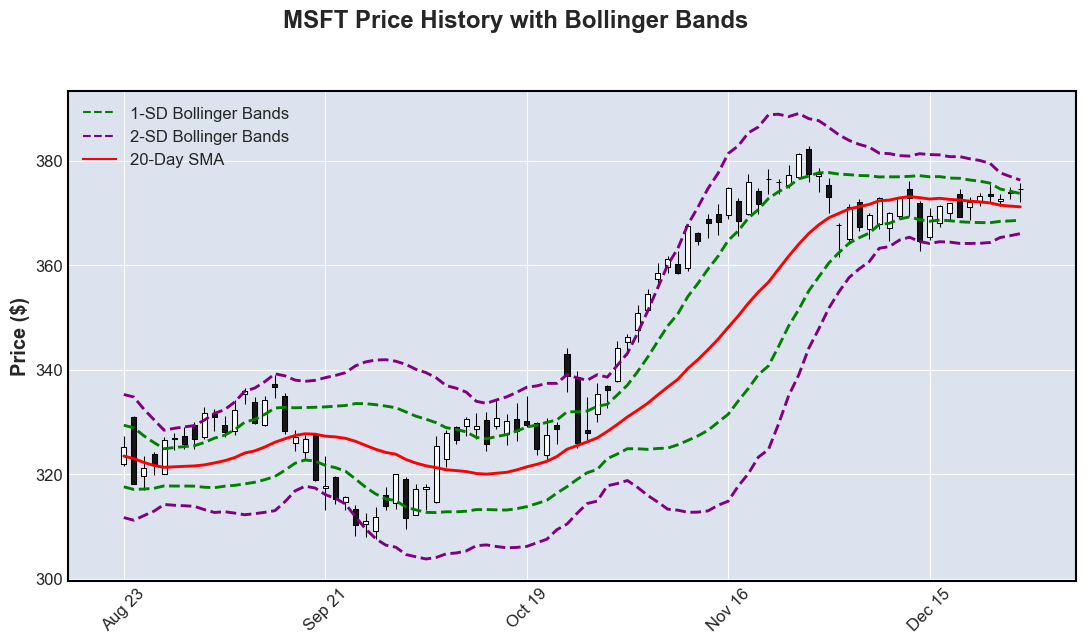

In [5]:
msft_data_last_90 = all_data.loc[:, 'MSFT'].tail(90)

msft_candlestick_data = msft_data_last_90[['Open', 'High', 'Low', 'Close']]
msft_bollinger_upper_1sd = msft_data_last_90['Bollinger_Upper_1SD']
msft_bollinger_lower_1sd = msft_data_last_90['Bollinger_Lower_1SD']
msft_bollinger_upper_2sd = msft_data_last_90['Bollinger_Upper_2SD']
msft_bollinger_lower_2sd = msft_data_last_90['Bollinger_Lower_2SD']
msft_sma_20 = msft_data_last_90['SMA_20']

apds = [
    mpf.make_addplot(msft_bollinger_upper_1sd, color='green', linestyle='--'),
    mpf.make_addplot(msft_bollinger_lower_1sd, color='green', linestyle='--'),
    mpf.make_addplot(msft_bollinger_upper_2sd, color='purple', linestyle='--'),
    mpf.make_addplot(msft_bollinger_lower_2sd, color='purple', linestyle='--'),
    mpf.make_addplot(msft_sma_20, color='red')
]

legend_handles = [
    Line2D([0], [0], color='green', linestyle='--', label='1-SD Bollinger Bands'),
    Line2D([0], [0], color='purple', linestyle='--', label='2-SD Bollinger Bands'),
    Line2D([0], [0], color='red', label='20-Day SMA')
]

fig, axlist = mpf.plot(msft_candlestick_data, type='candle', title='MSFT Price History with Bollinger Bands',
                       ylabel='Price ($)', figsize=(14, 7), addplot=apds, returnfig=True)

ax = axlist[0]
ax.legend(handles=legend_handles, loc='upper left')

plt.show()

Now that we have our indicators defined, we can use them to establish Buy, Neutral, and Sell zones.  
Additionally, we incorporate two more zones to handle scenarios where the price moves outside the 2-SD Bollinger Bands.  
These extra zones act solely as stop-loss triggers to manage significant trend reversals caused by news or events.

- **Buy Zone**: If the closing price is between the upper 1SD and 2SD Bollinger Bands.
- **Sell Zone**: If the closing price is between the lower 1SD and 2SD Bollinger Bands.
- **Neutral Zone**: If the closing price is between the 1SD Bollinger Bands.
- **Above Upper 2SD**: Close short positions to prevent further losses when the price rises above the upper 2SD Bollinger Band.
- **Below Lower 2SD**: Close long positions to prevent further losses when the price falls below the lower 2SD Bollinger Band.


In [6]:
for ticker in ticker_list:
    conditions = [
        # Above upper 2sd
        (all_data[(ticker, 'Close')] > all_data[(ticker, 'Bollinger_Upper_2SD')]),

        # Buy zone
        (all_data[(ticker, 'Close')] <= all_data[(ticker, 'Bollinger_Upper_2SD')]) & 
        (all_data[(ticker, 'Close')] >= all_data[(ticker, 'Bollinger_Upper_1SD')]),

        # Sell zone
        (all_data[(ticker, 'Close')] <= all_data[(ticker, 'Bollinger_Lower_1SD')]) & 
        (all_data[(ticker, 'Close')] >= all_data[(ticker, 'Bollinger_Lower_2SD')]),

        # Below lower 2sd
        (all_data[(ticker, 'Close')] < all_data[(ticker, 'Bollinger_Lower_2SD')])
    ]
    
    choices = ['Above Upper', 'Buy', 'Sell', 'Below Lower']

    all_data[(ticker, 'Zone_Type')] = np.select(conditions, choices, default='Neutral')

all_data[20:25]

MSFT                                   \
                                Open       High        Low      Close   
Date                                                                    
2013-01-31 00:00:00-05:00  22.630720  22.777301  22.313123  22.353842   
2013-02-01 00:00:00-05:00  22.532999  22.842451  22.435277  22.744730   
2013-02-04 00:00:00-05:00  22.695863  22.818015  22.329406  22.345694   
2013-02-05 00:00:00-05:00  22.492278  22.524852  22.280548  22.394556   
2013-02-06 00:00:00-05:00  22.296844  22.427141  22.190979  22.264271   

                                AAPL                                   \
                                Open       High        Low      Close   
Date                                                                    
2013-01-31 00:00:00-05:00  13.920930  13.990994  13.860005  13.875540   
2013-02-01 00:00:00-05:00  13.985817  13.997088  13.658037  13.818576   
2013-02-04 00:00:00-05:00  13.827406  13.889246  13.464593  13.474341   
2013-02-05 00:00:00-05:00  13.527041  14.005004  13.471294  13.947124   
2013-02-06 00:00:00-05:00  13.905393  14.210935  13.786892  13.932201   

                               NVDA            ...                TSLA  \
                               Open      High  ... Bollinger_Lower_1SD   
Date                                           ...                       
2013-01-31 00:00:00-05:00  0.284328  0.287559  ...            2.231460   
2013-02-01 00:00:00-05:00  0.285252  0.286406  ...            2.234384   
2013-02-04 00:00:00-05:00  0.283867  0.289637  ...            2.241570   
2013-02-05 00:00:00-05:00  0.282021  0.288713  ...            2.249958   
2013-02-06 00:00:00-05:00  0.280174  0.287098  ...            2.262736   

                                                                       MSFT  \
                          Bollinger_Upper_2SD Bollinger_Lower_2SD Zone_Type   
Date                                                                          
2013-01-31 00:00:00-05:00            2.573080            2.117587   Neutral   
2013-02-01 00:00:00-05:00            2.602531            2.111669       Buy   
2013-02-04 00:00:00-05:00            2.621559            2.114907   Neutral   
2013-02-05 00:00:00-05:00            2.642684            2.119049   Neutral   
2013-02-06 00:00:00-05:00            2.672028            2.126306   Neutral   

                               AAPL      NVDA      AMZN      GOOG  \
                          Zone_Type Zone_Type Zone_Type Zone_Type   
Date                                                                
2013-01-31 00:00:00-05:00      Sell   Neutral   Neutral   Neutral   
2013-02-01 00:00:00-05:00      Sell   Neutral   Neutral   Neutral   
2013-02-04 00:00:00-05:00      Sell   Neutral      Sell   Neutral   
2013-02-05 00:00:00-05:00   Neutral       Buy   Neutral   Neutral   
2013-02-06 00:00:00-05:00   Neutral   Neutral      Sell   Neutral   

                                  META      TSLA  
                             Zone_Type Zone_Type  
Date                                              
2013-01-31 00:00:00-05:00      Neutral       Buy  
2013-02-01 00:00:00-05:00      Neutral       Buy  
2013-02-04 00:00:00-05:00  Below Lower       Buy  
2013-02-05 00:00:00-05:00         Sell       Buy  
2013-02-06 00:00:00-05:00         Sell       Buy  

[5 rows x 77 columns]

The dataframe is fairly messy, with many intermediate columns used for calculations. We can tidy it up as follows.

In [7]:
columns_to_keep = ['Open', 'High', 'Low', 'Close', 'Zone_Type']
columns = []
for ticker in ticker_list:
    for column in columns_to_keep:
        columns.append((ticker, column))

backtest_df = all_data[columns]
backtest_df.head()

MSFT                                   \
                                Open       High        Low      Close   
Date                                                                    
2013-01-02 00:00:00-05:00  22.190972  22.581858  22.109537  22.492281   
2013-01-03 00:00:00-05:00  22.500425  22.516712  22.117682  22.190973   
2013-01-04 00:00:00-05:00  22.207259  22.264263  21.767510  21.775654   
2013-01-07 00:00:00-05:00  21.800080  21.889657  21.694214  21.734932   
2013-01-08 00:00:00-05:00  21.783792  21.816367  21.547631  21.620922   

                                          AAPL                        \
                          Zone_Type       Open       High        Low   
Date                                                                   
2013-01-02 00:00:00-05:00   Neutral  16.870954  16.906901  16.499613   
2013-01-03 00:00:00-05:00   Neutral  16.690005  16.744533  16.480420   
2013-01-04 00:00:00-05:00   Neutral  16.357655  16.408224  16.018298   
2013-01-07 00:00:00-05:00   Neutral  15.901626  16.124005  15.694479   
2013-01-08 00:00:00-05:00   Neutral  16.121264  16.202905  15.878780   

                                                ...       META             \
                               Close Zone_Type  ...       Open       High   
Date                                            ...                         
2013-01-02 00:00:00-05:00  16.725037   Neutral  ...  27.383728  28.122210   
2013-01-03 00:00:00-05:00  16.513929   Neutral  ...  27.822826  28.411616   
2013-01-04 00:00:00-05:00  16.053940   Neutral  ...  27.952559  28.870673   
2013-01-07 00:00:00-05:00  15.959506   Neutral  ...  28.631166  29.728911   
2013-01-08 00:00:00-05:00  16.002459   Neutral  ...  29.449484  29.539300   

                                                               TSLA            \
                                 Low      Close Zone_Type      Open      High   
Date                                                                            
2013-01-02 00:00:00-05:00  27.363769  27.942579   Neutral  2.333333  2.363333   
2013-01-03 00:00:00-05:00  27.533422  27.713053   Neutral  2.345333  2.363333   
2013-01-04 00:00:00-05:00  27.772928  28.701021   Neutral  2.320000  2.320000   
2013-01-07 00:00:00-05:00  28.591247  29.359669   Neutral  2.320000  2.320000   
2013-01-08 00:00:00-05:00  28.800818  29.000406   Neutral  2.300000  2.300000   

                                                         
                                Low     Close Zone_Type  
Date                                                     
2013-01-02 00:00:00-05:00  2.314000  2.357333   Neutral  
2013-01-03 00:00:00-05:00  2.316667  2.318000   Neutral  
2013-01-04 00:00:00-05:00  2.261333  2.293333   Neutral  
2013-01-07 00:00:00-05:00  2.260000  2.289333   Neutral  
2013-01-08 00:00:00-05:00  2.207333  2.245333   Neutral  

[5 rows x 35 columns]

# Implementing backtest

With our data prepared, we can now implement the double Bollinger band strategy, with a starting capital of $10,000.

Trading Rules
1. Buy Zone: 
   - Close short positions to prevent further losses.
   - Maintain existing long positions.
   - Open new long positions if none are open.
2. Sell Zone: 
   - Close long positions to prevent further losses.
   - Maintain existing short positions.
   - Open new short positions if none are currently open.
3. Neutral Zone: 
   - Close all open positions.
4. Above Upper 2SD Zone: 
   - Close short positions to stop losses.
5. Below Lower 2SD Zone: 
   - Close long positions to stop losses.

For the sake of diversification, we allocate our available capital equally across all equities in the Mag7, when favourable trades arise.
- Example: If MSFT, TSLA and NVDA simultaneously show a buy signal, we distribute 1/3 of our available capital to each of these three stocks.

Additionally, we simplify the short-selling process by assuming that the capital required to open a short position is equivalent to the amount needed to cover that position.  
We also assume that taking a short position does not immediately affect our capital balance.

In [8]:
INITIAL_CAPITAL = 10_000

realized_tracker = {ticker: [0] for ticker in ticker_list}
position_tracker = {ticker: [0] for ticker in ticker_list}    # Tracks market exposure

capital_invested = {ticker: 0 for ticker in ticker_list}
trade_hist = {ticker: 0 for ticker in ticker_list}    # Tracks prices when position was opened

available_capital = INITIAL_CAPITAL
for index, row in backtest_df.iterrows():

    # Closing positions
    tickers_needing_position = []    # Count the number of tickers that need a new position
    for ticker in ticker_list:
        zone_type = row[(ticker, 'Zone_Type')]
        current_price = row[(ticker, 'Close')]
        current_position = position_tracker[ticker][-1]
        position_value = capital_invested[ticker]

        if zone_type == 'Neutral':
            if current_position != 0:
                realized_pnl = (current_price - trade_hist[ticker]) * current_position
                available_capital += position_value + realized_pnl

                capital_invested[ticker] = 0
                realized_tracker[ticker].append(realized_pnl)
                position_tracker[ticker].append(0)
            
            else:
                realized_tracker[ticker].append(0)
                position_tracker[ticker].append(current_position)
            
        elif zone_type == 'Above Upper':
            if current_position < 0:
                realized_pnl = (current_price - trade_hist[ticker]) * current_position
                available_capital += position_value + realized_pnl
                
                capital_invested[ticker] = 0
                realized_tracker[ticker].append(realized_pnl)
                position_tracker[ticker].append(0)

            else:
                realized_tracker[ticker].append(0)
                position_tracker[ticker].append(current_position)
            
        elif zone_type == 'Below Lower':
            if current_position > 0:
                realized_pnl = (current_price - trade_hist[ticker]) * current_position
                available_capital += position_value + realized_pnl
                
                capital_invested[ticker] = 0
                realized_tracker[ticker].append(realized_pnl)
                position_tracker[ticker].append(0)

            else:
                realized_tracker[ticker].append(0)
                position_tracker[ticker].append(current_position)

        elif zone_type == 'Buy':
            if current_position > 0:
                realized_tracker[ticker].append(0)
                position_tracker[ticker].append(current_position)    # Stay long

            elif current_position < 0:

                # Close short
                realized_pnl = (current_price - trade_hist[ticker]) * current_position
                available_capital += position_value + realized_pnl
                realized_tracker[ticker].append(realized_pnl)

                # Prepare to open position in next step
                tickers_needing_position.append((ticker, zone_type))    

            else:
                realized_tracker[ticker].append(0)

                # Prepare to open position in next step
                tickers_needing_position.append((ticker, zone_type))

        else:
            if current_position < 0:
                realized_tracker[ticker].append(0)
                position_tracker[ticker].append(current_position)    # Stay short
            
            elif current_position > 0:
                # Close long
                realized_pnl = (current_price - trade_hist[ticker]) * current_position
                available_capital += position_value + realized_pnl
                realized_tracker[ticker].append(realized_pnl)
                
                # Prepare to open position in next step
                tickers_needing_position.append((ticker, zone_type))    

            else:
                realized_tracker[ticker].append(0)

                # Prepare to open position in next step
                tickers_needing_position.append((ticker, zone_type))

    # Opening positions
    if tickers_needing_position:
        amt_per_equity = available_capital / len(tickers_needing_position)    # Distribute capital evenly
        for ticker, zone_type in tickers_needing_position:
            current_price = row[(ticker, 'Close')]
            shares_to_open = int(amt_per_equity // current_price)
            required_capital = shares_to_open * current_price

            capital_invested[ticker] = required_capital
            position_tracker[ticker].append(shares_to_open * (1 if zone_type == 'Buy' else -1))

            trade_hist[ticker] = current_price
            available_capital -= required_capital

total_realized = pd.DataFrame(realized_tracker)
total_realized = total_realized.drop(total_realized.index[0])    # We remove the first row since we initialized realized_tracker with a default value of 0
total_realized.index = backtest_df.index
total_realized

,MSFT,AAPL,NVDA,AMZN,GOOG,META,TSLA
Date,,,,,,,
2013-01-02 00:00:00-05:00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
2013-01-03 00:00:00-05:00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
2013-01-04 00:00:00-05:00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
2013-01-07 00:00:00-05:00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
2013-01-08 00:00:00-05:00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,0.0,0.0,-0.319954,0.000000,0.000000,0.0,0.0
2023-12-26 00:00:00-05:00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
2023-12-27 00:00:00-05:00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0


# Evaluating performance

We can now visualize the performance of the strategy.  
By analyzing the P&L trajectory for each of the tickers simultaneously, we can understand where our profits come from.  
From the plot, we can see that the majority of our profits arise from TSLA and NVDA, while GOOG, MSFT, and META carry a majority of the losses.

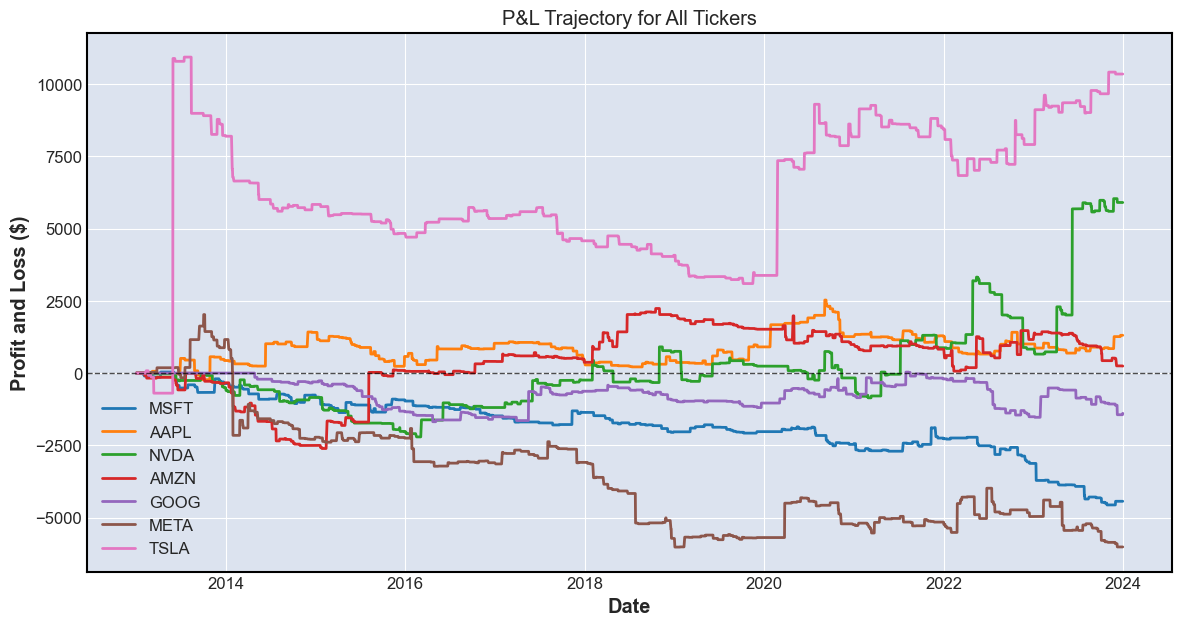

In [9]:
plt.figure(figsize=(14, 7))

for ticker in total_realized.columns:
    cumulative_sum = np.cumsum(total_realized[ticker])
    plt.plot(total_realized.index, cumulative_sum, label=ticker)

plt.title('P&L Trajectory for All Tickers')
plt.xlabel('Date')
plt.ylabel('Profit and Loss ($)')
plt.axhline(0, color='black', linestyle='--', alpha=0.7, linewidth=1)
plt.legend()
plt.show()

Next, we will assess the performance of the strategy by examining the capital trajectory.  
Starting with an initial capital of `$10,000`, we see a gain of approximately `$6,000`, which represents a 60% increase over 11 years.  
However, the graph shows that the strategy's returns are not particularly impressive. The performance is characterized by periods of significant drawdowns and high volatility.

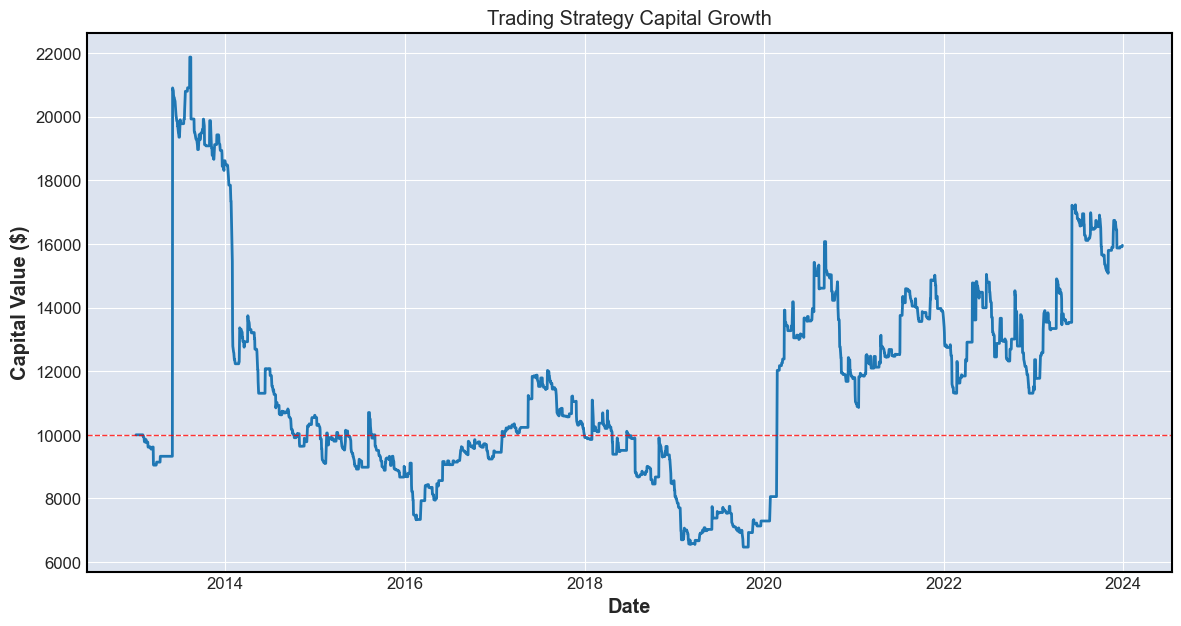

In [10]:
cumulative_sum = np.cumsum(total_realized.sum(axis=1))    # Sum along the time-axis
capital_trajectory = cumulative_sum + INITIAL_CAPITAL

plt.figure(figsize=(14, 7))
plt.plot(capital_trajectory)
plt.title('Trading Strategy Capital Growth')
plt.xlabel('Date')
plt.ylabel('Capital Value ($)')
plt.axhline(10000, color='red', linestyle='--', alpha=0.8, linewidth=1, label='Starting Capital')
plt.show()

We can now calculate some common summary statistics from our capital trajectory to better understand the performance of the strategy.

We use the 10-Year Treasury yield as our risk-free rate, which was 2.02% in January 2013, according to data from [FRED](https://fred.stlouisfed.org/series/DGS10).

As we see from our summary statistics:

- The strategy suffers from high drawdowns of 70%.
- The Sharpe and Sortino ratios are low, at 0.05 and 0 respectively.

These results highlight that the risk-adjusted returns of the strategy are not appealing.

Furthermore, with a total return of 59.57% over 11 years, the strategy underperforms compared to broader market indices. For example, the Nasdaq-100 posted returns of about 536% over the same period.


In [11]:
def calculate_stats(capital_trajectory, rfr):
    # Total Return
    total_return = capital_trajectory.iloc[-1] / capital_trajectory.iloc[0] - 1
    total_return = round(total_return * 100, 2)

    # Annual Return
    num_years = (capital_trajectory.index[-1] - capital_trajectory.index[0]).days / 365.25
    annual_return = (1 + total_return / 100) ** (1 / num_years) - 1
    annual_return = round(annual_return * 100, 2)

    # Annual Volatility
    daily_returns = capital_trajectory.pct_change().dropna()
    annual_volatility = daily_returns.std() * np.sqrt(252)
    annual_volatility = round(annual_volatility * 100, 2)

    # Sharpe Ratio
    sharpe = (annual_return / 100 - rfr) / (annual_volatility / 100)
    sharpe = round(sharpe, 2)

    # Sortino Ratio
    downside_returns = daily_returns[daily_returns < 0]
    downside_std = downside_returns.std() * np.sqrt(252)
    sortino = (annual_return / 100 - rfr) / (downside_std * 100)
    sortino = round(sortino, 2)

    # Maximum Drawdown
    running_max = capital_trajectory.cummax()
    drawdown = (capital_trajectory - running_max) / running_max
    max_drawdown = drawdown.min()
    max_drawdown = round(max_drawdown * 100, 2)

    stats = pd.DataFrame({
        'Statistic': ['Total Return', 'Annual Return', 'Annual Volatility', 'Sharpe Ratio', 'Sortino Ratio', 'Maximum Drawdown'],
        'Value': [f"{total_return}%", f"{annual_return}%", f"{annual_volatility}%", sharpe, sortino, f"{max_drawdown}%"]
    })

    return stats

calculate_stats(capital_trajectory, 0.0202)

,Statistic,Value
0,Total Return,59.57%
1,Annual Return,4.35%
2,Annual Volatility,47.52%
3,Sharpe Ratio,0.05
4,Sortino Ratio,0.0
5,Maximum Drawdown,-70.42%


# Potential improvements

A possible reason for the strategy's poor performance is the inherent limitations of Bollinger Bands.  
Bollinger Bands are calculated using historical volatility, based on a rolling standard deviation, which may not accurately reflect future market volatility — especially during significant events like earnings releases, news events, or Federal Reserve decisions.

To address this, we can incorporate implied volatility (IV) data from the options market. Implied volatility represents the market's forecast of future volatility and can be obtained from at-the-money options prices. We can do this in the following manner:

### 1. Calculate Expected Move

Using the formula:

$$
\text{Expected Move} = \text{Current Price} \times \text{IV} \times \sqrt{\frac{\text{DTE}}{365}}
$$

where IV is the implied volatility of the at-the-money options, and DTE represents the days to expiry of the options contract.


### 2. Determine the Bands

To create bands similar to Bollinger Bands, calculate:

$$
\text{1-SD Expected Move Bands} = \text{SMA-20 ± 1} \times \text{Expected Move}
$$
$$
\text{2-SD Expected Move Bands} = \text{SMA-20 ± 2} \times \text{Expected Move}
$$

Here, SMA-20 is the 20-day simple moving average.

### Example Calculation

Suppose the current price of a stock is \$100, the implied volatility (IV) from the options market is 30% (0.30), and we are considering a 30-day period:

- Expected Move:

  $$
  \text{Expected Move} = 100 \times 0.30 \times \sqrt{\frac{30}{365}} \approx \$8.60
  $$

- If the 20-day SMA is \$90:

  - Upper Band (2-SD): 
    $$
    90 + 2 \times 8.60 = \$107.20
    $$
  - Upper Band (1-SD):
    $$
    90 + 1 \times 8.60 = \$98.60
    $$
  - Lower Band (1-SD):
    $$
    90 - 1 \times 8.60 = \$81.40
    $$
  - Lower Band (2-SD):
    $$
    90 - 2 \times 8.60 = \$72.80
    $$
    
This setup indicates a buy signal because the current stock price (`$100`) falls between the 1-SD Upper Band (`$98.60`) and the 2-SD Upper Band (`$107.20`).

By using implied volatility, we maintain the core idea of the double Bollinger Bands strategy, while incorporating forward-looking volatility estimates. This approach enhances the strategy by aligning it with current market expectations rather than relying solely on historical data.